# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
import os

try:
    df = pd.read_csv('../bank-additional-full_raw.csv', sep=';')
except FileNotFoundError:
    df = pd.read_csv('Eksperimen_SML_Moch-Arief-Kresnanda/bank-additional-full_raw.csv', sep=';')

display(df.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


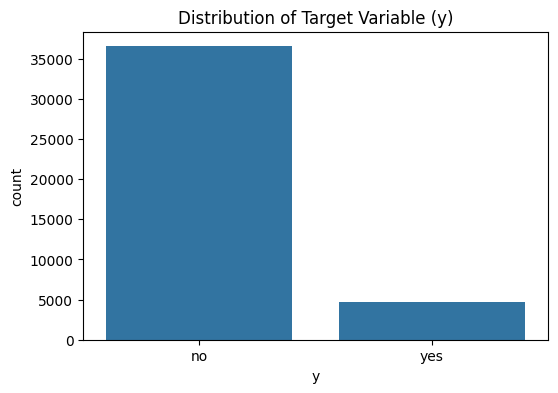


Unique values in job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Unique values in marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Unique values in education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Unique values in default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Unique values in housing:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

Unique values in

In [3]:
# dataset info
print("Dataset Info:")
df.info()

# missing values
print("\nMissing Values:")
print(df.isnull().sum())

# duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Statistical summary
display(df.describe())

# Distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.show()

# Cek variabel kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# Drop kolom irelevan
df_clean = df.drop(columns=['duration'])

# hapus duplikat
df_clean = df_clean.drop_duplicates()
print(f"Shape after dropping duplicates: {df_clean.shape}")

# Ubah pdays 999 menjadi kategori baru atau biner
df_clean['previously_contacted'] = np.where(df_clean['pdays'] == 999, 0, 1)
df_clean = df_clean.drop(columns=['pdays']) 

# Membatasi nilai campaign
upper_limit = df_clean['campaign'].quantile(0.99)
df_clean['campaign'] = np.where(df_clean['campaign'] > upper_limit, upper_limit, df_clean['campaign'])

# Pisahkan fitur dan target
X = df_clean.drop(columns=['y'])
y = df_clean['y']

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)
print("Target classes:", le.classes_)

# Identify columns types

# Ordinal (Punya urutan atau Biner)
ordinal_cols = ['education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']

# Definisikan urutan untuk masing-masing
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'unknown']
default_order = ['no', 'yes', 'unknown']
housing_order = ['no', 'yes', 'unknown']
loan_order    = ['no', 'yes', 'unknown']
contact_order = ['telephone', 'cellular']
month_order   = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order     = ['mon', 'tue', 'wed', 'thu', 'fri']

all_ordinal_categories = [
    education_order, default_order, housing_order, loan_order, 
    contact_order, month_order, day_order
]

# Nominal (Murni Kategori, tanpa urutan)
categorical_cols = ['job', 'marital', 'poutcome']

# Numerical
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
# Pastikan kolom yang sudah masuk ordinal/categorical tidak masuk numerical
numerical_cols = [col for col in numerical_cols if col not in ordinal_cols and col not in categorical_cols]

print(f"Numerical columns: {list(numerical_cols)}")
print(f"Nominal (OneHot) columns: {list(categorical_cols)}")
print(f"Ordinal columns: {list(ordinal_cols)}")

# Preprocessing pipeline
# Numerical
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    # ('yeo_johnson', PowerTransformer(method='yeo-johnson')), # Removed for stability
    ('scaler', StandardScaler())
])

# Categorical (Nominal): OneHot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Categorical (Ordinal): Ordinal Encoding
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('ordinal', OrdinalEncoder(categories=all_ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat_nominal', categorical_transformer, categorical_cols),
        ('cat_ordinal', ordinal_transformer, ordinal_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing
# Fit on training data, transform on both
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Handle Imbalance dengan SMOTE
print("Before SMOTE counts:", np.bincount(y_train))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)
print("After SMOTE counts:", np.bincount(y_train_resampled))

# Update variabel training data ke hasil resampling
X_train_processed = X_train_resampled
y_train = y_train_resampled

# Verifikasi
try:
    cat_nominal_names = preprocessor.named_transformers_['cat_nominal']['onehot'].get_feature_names_out(categorical_cols)
    feature_names = list(numerical_cols) + list(cat_nominal_names) + list(ordinal_cols)
    
    # Convert back to dataframe for verification
    X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
    print("Processed Train Data Shape:", X_train_df.shape)
    display(X_train_df.head())
except Exception as e:
    print(f"Could not create DataFrame: {e}")
    print("Processed Train Data Shape:", X_train_processed.shape)

print("Preprocessing complete.")

Shape after dropping duplicates: (39404, 20)
Target classes: ['no' 'yes']
Numerical columns: ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'previously_contacted']
Nominal (OneHot) columns: ['job', 'marital', 'poutcome']
Ordinal columns: ['education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
Before SMOTE counts: [27845  3678]
After SMOTE counts: [27845 27845]
Processed Train Data Shape: (55690, 35)


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,previously_contacted,job_admin.,...,poutcome_failure,poutcome_nonexistent,poutcome_success,education,default,housing,loan,contact,month,day_of_week
0,1.411992,-0.653759,-0.353222,-1.180185,-0.859019,-1.418774,-1.225050,-0.920589,-0.199104,0.0,...,0.0,1.0,0.0,6.0,0.0,0.0,1.0,1.0,3.0,0.0
1,-0.398308,0.601501,-0.353222,0.656654,0.712687,0.882887,0.720257,0.343480,-0.199104,0.0,...,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0
2,-0.684145,-0.653759,-0.353222,-1.180185,-1.170281,-1.225176,-1.295058,-0.920589,-0.199104,1.0,...,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,4.0,1.0
3,-0.779424,-0.653759,-0.353222,-2.193613,-2.049342,2.302603,-1.618128,-2.042984,-0.199104,0.0,...,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.0,8.0,2.0
4,-1.255819,-0.235339,-0.353222,-1.876917,-1.895421,1.485191,-1.524593,-1.235575,-0.199104,0.0,...,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.0,6.0,0.0


Preprocessing complete.


In [5]:

# DataFrame untuk Training Data 
train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
train_processed_df['y'] = y_train

# DataFrame untuk Testing Data
# X_test_processed sudah di-transform sebelumnya
test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)
test_processed_df['y'] = y_test   

# lokasi penyimpanan
output_dir = 'bank_marketing_preprocessing'
os.makedirs(output_dir, exist_ok=True)

train_path = os.path.join(output_dir, 'train_processed.csv')
test_path = os.path.join(output_dir, 'test_processed.csv')

# Simpan ke CSV
train_processed_df.to_csv(train_path, index=False)
test_processed_df.to_csv(test_path, index=False)

print(f"Dataset hasil preprocessing berhasil disimpan:")
print(f"Train: {train_path} | Shape: {train_processed_df.shape}")
print(f"Test : {test_path}  | Shape: {test_processed_df.shape}")

Dataset hasil preprocessing berhasil disimpan:
Train: bank_marketing_preprocessing\train_processed.csv | Shape: (55690, 36)
Test : bank_marketing_preprocessing\test_processed.csv  | Shape: (7881, 36)
